In [144]:
import numpy as np
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  

In [145]:
df_train = pd.read_csv("loanprediction_train.csv")
df = pd.read_csv("loanprediction_train.csv")

In [146]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [147]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [148]:
#Adding value for null value
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mode()[0], inplace = True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)

In [149]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Number of people who take loan as group by marital status: 
Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

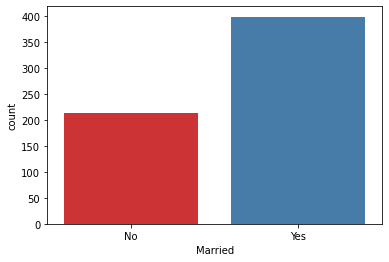

In [150]:
print ("Number of people who take loan as group by marital status: ")
print(df["Married"].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set1')

Number of people who take loan as group by gender: 
Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

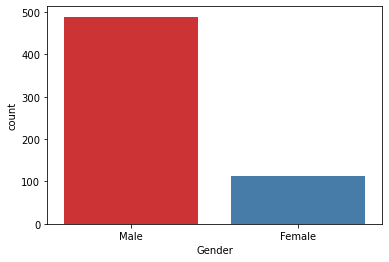

In [151]:
print ("Number of people who take loan as group by gender: ")
print(df["Gender"].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set1')

Number of people who take loan as group by education status: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

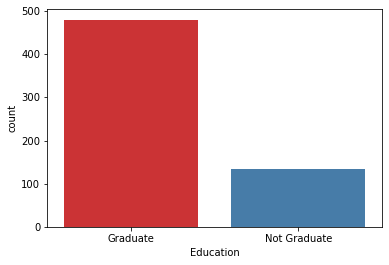

In [152]:
print ("Number of people who take loan as group by education status: ")
print(df["Education"].value_counts())
sns.countplot(x='Education', data=df, palette = 'Set1')

Number of people who take loan as group by Property_Area: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

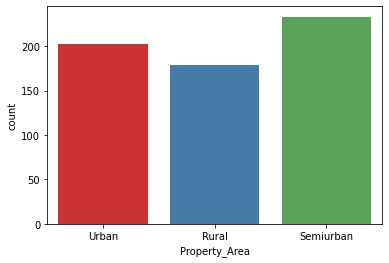

In [153]:
print ("Number of people who take loan as group by Property_Area: ")
print(df["Property_Area"].value_counts())
sns.countplot(x='Property_Area', data=df, palette = 'Set1')

Number of people who take loan as group by Loan status: 


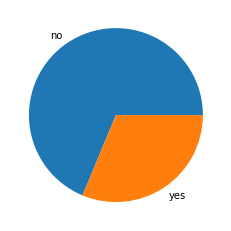

In [154]:
print ("Number of people who take loan as group by Loan status: ")
x = df['Loan_Status'].value_counts()
plt.pie(x,labels=['no','yes']);

Number of people who take loan as group by Self_Employed status: 
No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

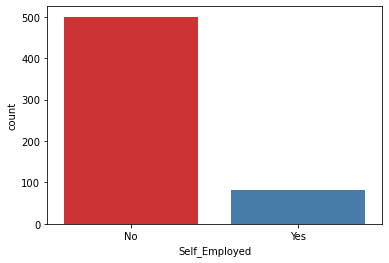

In [155]:
print ("Number of people who take loan as group by Self_Employed status: ")
print(df["Self_Employed"].value_counts())
sns.countplot(x='Self_Employed', data=df, palette = 'Set1')

In [156]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [157]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [158]:
df_train = df_train.drop(columns=['Self_Employed', 'Loan_ID','Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

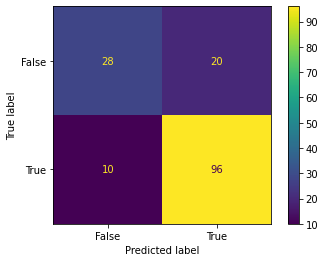

In [159]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [160]:
#pip install scorecardpy
import scorecardpy as sc

In [161]:
#df_train['Loan_Status'].unique()
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 0, 'N': 1})

In [162]:
df_train

,Gender,Married,Education,Property_Area,Loan_Status
0,Male,No,Graduate,Urban,0
1,Male,Yes,Graduate,Rural,1
2,Male,Yes,Graduate,Urban,0
3,Male,Yes,Not Graduate,Urban,0
4,Male,No,Graduate,Urban,0
...,...,...,...,...,...
609,Female,No,Graduate,Rural,0
610,Male,Yes,Graduate,Rural,0
611,Male,Yes,Graduate,Urban,0
612,Male,Yes,Graduate,Urban,0


In [163]:
y = 'Loan_Status'

In [164]:
bins = sc.woebin(df_train,y)

[INFO] creating woe binning ...


{'Education': <Figure size 432x288 with 2 Axes>,
 'Property_Area': <Figure size 432x288 with 2 Axes>,
 'Gender': <Figure size 432x288 with 2 Axes>,
 'Married': <Figure size 432x288 with 2 Axes>}

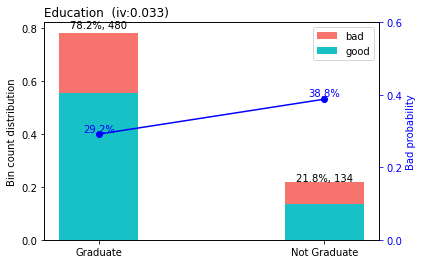

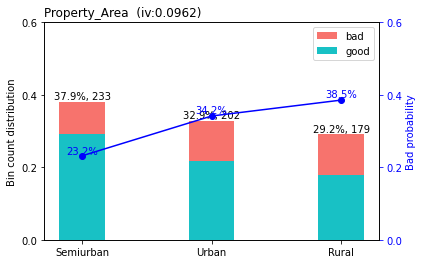

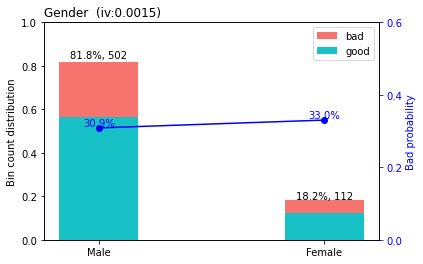

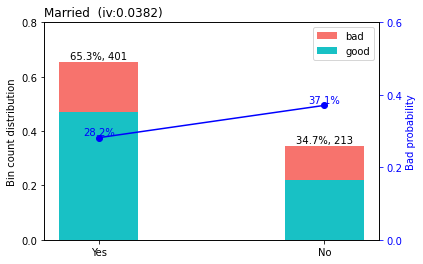

In [165]:
sc.woebin_plot(bins)